In [42]:
library(dplyr)
library(tidyverse)
library(stargazer)
library(corrplot)
library(plm)
library(stats)
library(plotly)
library(cowplot)

In [43]:
# Dataset
leverage <- read_csv("D:/roshan/leverage/leverage.csv")
m.eco <- read_csv("D:/roshan/leverage/macro_economic.csv")
m.eco2 <- read_csv("D:/roshan/leverage/meco.csv")
head(m.eco)
head(m.eco2)
head(leverage)

Rows: 56 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): firms
dbl (4): year, ldr, sdr, dr

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 12 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): year, interest, inflation, gdp_growth, stock_market_capitalization_gdp

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 48 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): macroeconomic
dbl (2): year, percent

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,interest,inflation,gdp_growth,stock_market_capitalization_gdp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2011,0.1090,0.096,0.034,0.240
2012,0.1100,0.083,0.047,0.236
2013,0.1209,0.099,0.035,0.302
2014,0.1141,0.090,0.060,0.548
2015,0.0984,0.072,0.040,0.466
2016,0.0929,0.099,0.004,0.841


year,macroeconomic,percent
<dbl>,<chr>,<dbl>
2011,Interest Rate,0.1090
2012,Interest Rate,0.1100
2013,Interest Rate,0.1209
2014,Interest Rate,0.1141
2015,Interest Rate,0.0984
2016,Interest Rate,0.0929


year,firms,ldr,sdr,dr
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2011,HDL,0.0711,0.2730,0.3440
2012,HDL,0.0031,0.2274,0.2305
2013,HDL,0.0013,0.1865,0.1878
2014,HDL,0.0711,0.2074,0.2785
2015,HDL,0.0448,0.1571,0.2019
2016,HDL,0.0320,0.0808,0.1128


In [44]:
# Font
font = list(
    family = "DM Sans",
    size = 15,
    color = "white"
)

label = list(
    bgcolor = "#2f2d2d",
    font = font,
    bordercolor = "transparent"
)

In [45]:
# Plot for short-term debt
leverage.sdr <- leverage %>%
select(year, firms, sdr) %>%
group_by(year) %>%
mutate(Median = round(median(sdr, na.rm =T)*100,2),
SDR = sdr*100) %>%
rename("Firm" = "firms", "Year" = "year") %>%
ggplot(aes(Year)) +
geom_line(aes(y = SDR, color = Firm), linetype = 2, linewidth = 0.9) +
geom_line(aes(y = Median), linetype = 1, linewidth = 1.3) + 
scale_x_continuous(breaks = seq(2011,2022, by = 1)) +
labs(
    title = "Short-Term Debt Ratio of Manufacturing Firms",
    x = "",
    y = "%",
    caption = "Notes: \na. Short-term debt ratio is calculated by author using data from the annual report from respective firms. \nb. The black line represents the median short-term debt ratio."
) +
theme_minimal() +
theme(axis.text.x = element_text(size = 11, color = "black"),
axis.text = element_text(color = "black", size = 16),
axis.text.y = element_text(size = 11, color = "black"),
panel.grid.major.y = element_line(color = "gray", linetype = "dashed"),
panel.grid.major.x = element_blank(),
legend.position = "bottom",
title = element_text(size = 14, color = "black", face = "bold"),
plot.caption = element_text(color = "black", face = "plain", size = 10, hjust = 0)) +
scale_color_manual(
    name = "",
    breaks = c("BNL", "BNT", "HDL", "NLO", "SHIVM", "UNL"),
    values = c("red", "#f210cc", "#eeee0e", "#479d47", "navyblue", "#0cbee2")
) 

p1 <- ggplotly(leverage.sdr) %>%
style(hoverlabel = label) %>%
layout(
    yaxis = list(fixedrange = TRUE),
    xaxis = list(fixedrange = TRUE)) %>%
config(displayModeBar = FALSE)

Sys.setenv("plotly_username" = "RoshanRai")
Sys.setenv("plotly_api_key"="LeTBVhCSwHESr1t0tR4l")
api_create(p1, "SDR")


Found a grid already named: 'SDR Grid'. Since fileopt='overwrite', I'll try to update it

Found a plot already named: 'SDR'. Since fileopt='overwrite', I'll try to update it



In [46]:
# Plot for long-term debt
leverage.ldr <- leverage %>%
select(year, firms, ldr) %>%
group_by(year) %>%
mutate(Median = median(ldr, na.rm =T)*100,
LDR = ldr*100) %>%
rename("Firm" = "firms", "Year" = "year") %>%
ggplot(aes(Year)) +
geom_line(aes(y = LDR, color = Firm), linetype = 2, linewidth = 0.9) +
geom_line(aes(y = Median), linetype = 1, linewidth = 1.3) + 
scale_x_continuous(breaks = seq(2011,2022, by = 1)) +
scale_y_continuous(breaks = seq(0,40, by = 5)) +
labs(
    title = "Long-Term Debt Ratio of Manufacturing Firms",
    x = "",
    y = "%",
    caption = "Notes: \na. Long-term debt ratio is calculated by author using data from the annual report from respective firms. \nb. The black line represents the median long-term debt ratio."
) +
theme_minimal() +
theme(axis.text.x = element_text(size = 11, color = "black"),
axis.text = element_text(color = "black", size = 16),
axis.text.y = element_text(size = 11, color = "black"),
panel.grid.major.y = element_line(color = "gray", linetype = "dashed"),
panel.grid.major.x = element_blank(),
legend.position = "bottom",
title = element_text(size = 14, color = "black", face = "bold"),
plot.caption = element_text(color = "black", face = "plain", size = 10, hjust = 0)) +
scale_color_manual(
    name = "",
    breaks = c("BNL", "BNT", "HDL", "NLO", "SHIVM", "UNL"),
    values = c("red", "#f210cc", "#eeee0e", "#479d47", "navyblue", "#0cbee2")
) 

p2 <- ggplotly(leverage.ldr) %>%
style(hoverlabel = label) %>%
layout(
    yaxis = list(fixedrange = TRUE),
    xaxis = list(fixedrange = TRUE)) %>%
config(displayModeBar = FALSE)

Sys.setenv("plotly_username" = "RoshanRai")
Sys.setenv("plotly_api_key"="LeTBVhCSwHESr1t0tR4l")
api_create(p2, "LDR")

Found a grid already named: 'LDR Grid'. Since fileopt='overwrite', I'll try to update it

Found a plot already named: 'LDR'. Since fileopt='overwrite', I'll try to update it



In [47]:
# Plot for total debt ratio
leverage.dr <- leverage %>%
select(year, firms, dr) %>%
group_by(year) %>%
mutate(Median = median(dr, na.rm =T) * 100,
DR = dr * 100) %>%
rename("Year" = "year", "Firm" = "firms") %>%
ggplot(aes(Year)) +
geom_line(aes(y = DR, color = Firm), linetype = 2, linewidth = 0.9) +
geom_line(aes(y = Median), linetype = 1, linewidth = 1.3) + 
scale_x_continuous(breaks = seq(2011,2022, by = 1)) +
labs(
    title = "Total Debt Ratio of Manufacturing Firms",
    x = "",
    y = "%",
    caption = "Notes: \na. Total debt ratio is calculated by author using data from the annual report from respective firms. \nb. The black line represents the median total debt ratio."
) +
theme_minimal() +
theme(axis.text.x = element_text(size = 11, color = "black"),
axis.text = element_text(color = "black", size = 16),
axis.text.y = element_text(size = 11, color = "black"),
panel.grid.major.y = element_line(color = "gray", linetype = "dashed"),
panel.grid.major.x = element_blank(),
legend.position = "bottom",
title = element_text(size = 14, color = "black", face = "bold"),
plot.caption = element_text(color = "black", face = "plain", size = 10, hjust = 0)) +
scale_color_manual(
    name = "",
    breaks = c("BNL", "BNT", "HDL", "NLO", "SHIVM", "UNL"),
    values = c("red", "#f210cc", "#eeee0e", "#479d47", "navyblue", "#0cbee2")
) 

p3 <- ggplotly(leverage.dr) %>%
style(hoverlabel = label) %>%
layout(
    yaxis = list(fixedrange = TRUE),
    xaxis = list(fixedrange = TRUE)) %>%
config(displayModeBar = FALSE)

Sys.setenv("plotly_username" = "RoshanRai")
Sys.setenv("plotly_api_key"="LeTBVhCSwHESr1t0tR4l")
api_create(p3, "DR")

Found a grid already named: 'DR Grid'. Since fileopt='overwrite', I'll try to update it

Found a plot already named: 'DR'. Since fileopt='overwrite', I'll try to update it



Found a grid already named: 'Macroeconomic condition of Nepal Grid'. Since fileopt='overwrite', I'll try to update it

Found a plot already named: 'Macroeconomic condition of Nepal'. Since fileopt='overwrite', I'll try to update it



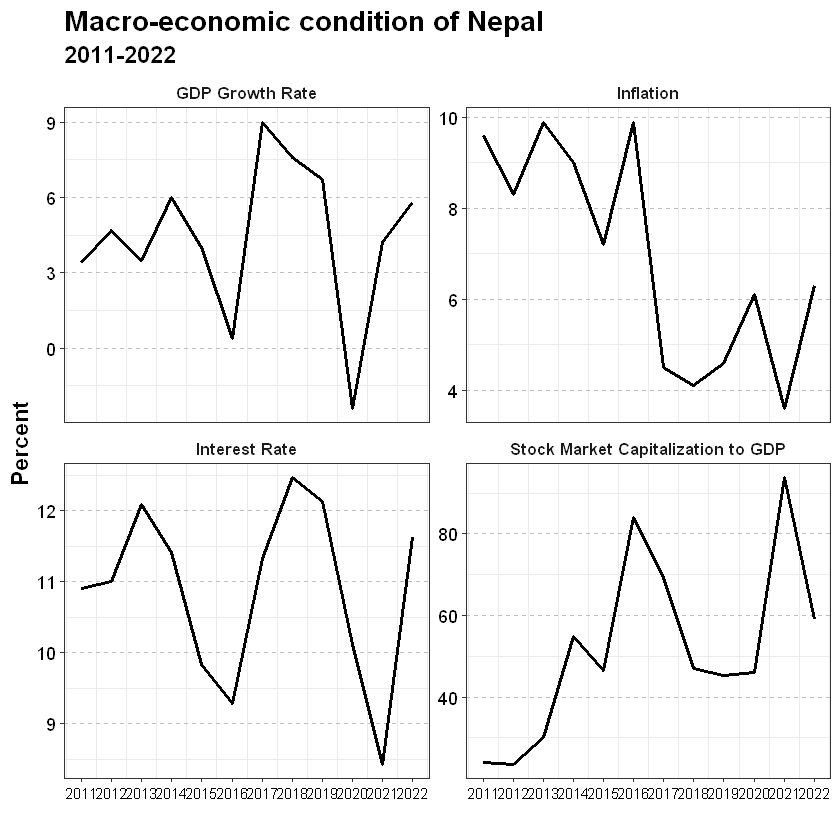

In [60]:
# Macro-economic variables plot
m.eco2.plot <- m.eco2 %>%
mutate(percent = percent * 100) %>%
ggplot(aes(x = year)) +
geom_line(aes(y = percent), size = 1) +
facet_wrap(~macroeconomic, scales = "free_y") +
scale_x_continuous(breaks = seq(2011,2022, by = 1)) + 
labs(
    title = "Macro-economic condition of Nepal",
    subtitle = "2011-2022",
    x = "",
    y = "Percent",
) +
theme_bw() +
theme(axis.text.x = element_text(size = 9, color = "black"),
axis.text = element_text(color = "black", size = 16),
axis.text.y = element_text(size = 11, color = "black"),
panel.grid.major.y = element_line(color = "gray", linetype = "dashed"),
panel.grid.major.x = element_blank(),
title = element_text(size = 14, color = "black", face = "bold"),
strip.background = element_blank(),
strip.placement = "outside",
strip.text.x = element_text(size = 10, face = "bold"))

p4 <- ggplotly(m.eco2.plot) %>%
style(hoverlabel = label) %>%
layout(
    yaxis = list(fixedrange = TRUE),
    xaxis = list(fixedrange = TRUE)) %>%
config(displayModeBar = FALSE)

Sys.setenv("plotly_username" = "RoshanRai")
Sys.setenv("plotly_api_key"="LeTBVhCSwHESr1t0tR4l")
api_create(p4, "Macroeconomic condition of Nepal")

In [49]:
# Proportion of short and long-term debt in total debt
debt.proportion <- leverage %>%
mutate(ldr.prop = round(ifelse(is.nan(ldr/dr), 0, ldr/dr),4),
sdr.prop = round(ifelse(is.nan(sdr/dr), 0, sdr/dr),4)) %>%
group_by(firms) %>%
dplyr::summarise(median.ldr.prop = round(median(ldr.prop),2),
median.sdr.prop = round(median(sdr.prop),2))

debt.proportion

firms,median.ldr.prop,median.sdr.prop
<chr>,<dbl>,<dbl>
BNL,0.00,1.00
BNT,0.32,0.68
HDL,0.02,0.94
NLO,0.00,1.00
SHIVM,0.42,0.58
UNL,0.00,0.00


In [50]:
# Descriptive Statistics
summary(leverage)
summary(m.eco)

      year         firms                ldr               sdr        
 Min.   :2011   Length:56          Min.   :0.00000   Min.   :0.0000  
 1st Qu.:2015   Class :character   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :2018   Mode  :character   Median :0.00000   Median :0.1092  
 Mean   :2017                      Mean   :0.03169   Mean   :0.1314  
 3rd Qu.:2020                      3rd Qu.:0.03260   3rd Qu.:0.2200  
 Max.   :2022                      Max.   :0.27510   Max.   :0.4417  
       dr        
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.1303  
 Mean   :0.1631  
 3rd Qu.:0.2989  
 Max.   :0.4741  

      year         interest        inflation         gdp_growth      
 Min.   :2011   Min.   :0.0843   Min.   :0.03600   Min.   :-0.02400  
 1st Qu.:2014   1st Qu.:0.1004   1st Qu.:0.04575   1st Qu.: 0.03475  
 Median :2016   Median :0.1116   Median :0.06750   Median : 0.04450  
 Mean   :2016   Mean   :0.1089   Mean   :0.06925   Mean   : 0.04408  
 3rd Qu.:2019   3rd Qu.:0.1174   3rd Qu.:0.09150   3rd Qu.: 0.06175  
 Max.   :2022   Max.   :0.1247   Max.   :0.09900   Max.   : 0.09000  
 stock_market_capitalization_gdp
 Min.   :0.2360                 
 1st Qu.:0.4145                 
 Median :0.4685                 
 Mean   :0.5200                 
 3rd Qu.:0.6168                 
 Max.   :0.9380                 

In [51]:
# correlation matrix of explanatory variables
cor.df <- m.eco %>%
select(-year)

round(cor(cor.df),4)

,interest,inflation,gdp_growth,stock_market_capitalization_gdp
interest,1.0000,-0.0083,0.5543,-0.5854
inflation,-0.0083,1.0000,-0.4157,-0.3982
gdp_growth,0.5543,-0.4157,1.0000,0.0103
stock_market_capitalization_gdp,-0.5854,-0.3982,0.0103,1.0000


In [52]:
# leverage and m.eco dataframe
leverage.meco <- leverage %>%
inner_join(m.eco, by = "year")

head(leverage.meco)

year,firms,ldr,sdr,dr,interest,inflation,gdp_growth,stock_market_capitalization_gdp
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2011,HDL,0.0711,0.2730,0.3440,0.1090,0.096,0.034,0.240
2012,HDL,0.0031,0.2274,0.2305,0.1100,0.083,0.047,0.236
2013,HDL,0.0013,0.1865,0.1878,0.1209,0.099,0.035,0.302
2014,HDL,0.0711,0.2074,0.2785,0.1141,0.090,0.060,0.548
2015,HDL,0.0448,0.1571,0.2019,0.0984,0.072,0.040,0.466
2016,HDL,0.0320,0.0808,0.1128,0.0929,0.099,0.004,0.841


#### Fixed Effects Panel Regression Model (Individual Effects)

In [53]:
# Long-term debt ratio model
ldr.model <- lm(ldr ~ interest + inflation + gdp_growth + stock_market_capitalization_gdp + firms, data = leverage.meco)

summary(ldr.model)


Call:
lm(formula = ldr ~ interest + inflation + gdp_growth + stock_market_capitalization_gdp + 
    firms, data = leverage.meco)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.106911 -0.013099 -0.004098  0.006250  0.175228 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      0.11189    0.13533   0.827 0.412630    
interest                        -0.91722    1.05186  -0.872 0.387738    
inflation                        0.05101    0.40762   0.125 0.900963    
gdp_growth                       0.24373    0.33549   0.726 0.471214    
stock_market_capitalization_gdp -0.02624    0.05670  -0.463 0.645736    
firmsBNT                         0.08769    0.02429   3.610 0.000753 ***
firmsHDL                         0.00820    0.02127   0.385 0.701693    
firmsNLO                        -0.01012    0.02721  -0.372 0.711651    
firmsSHIVM                       0.08588    0.02721   3.157 0.002816 ** 
firmsUNL   

In [54]:
#short-term debt ratio model
sdr.model <- lm(sdr ~ interest + inflation + gdp_growth + stock_market_capitalization_gdp + firms, data = leverage.meco)
summary(sdr.model)


Call:
lm(formula = sdr ~ interest + inflation + gdp_growth + stock_market_capitalization_gdp + 
    firms, data = leverage.meco)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.109089 -0.041196  0.003489  0.041119  0.112456 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      0.402792   0.152097   2.648 0.011047 *  
interest                        -2.948056   1.182167  -2.494 0.016297 *  
inflation                        1.184955   0.458116   2.587 0.012923 *  
gdp_growth                       1.014793   0.377052   2.691 0.009888 ** 
stock_market_capitalization_gdp -0.211518   0.063727  -3.319 0.001772 ** 
firmsBNT                         0.145443   0.027300   5.328 2.91e-06 ***
firmsHDL                         0.040358   0.023910   1.688 0.098200 .  
firmsNLO                         0.333015   0.030577  10.891 2.52e-14 ***
firmsSHIVM                       0.006331   0.030577   0.207 0.836878    
f

In [55]:
# debt ratio model
dr.model <- lm(dr ~ interest + inflation + gdp_growth + stock_market_capitalization_gdp + firms, data = leverage.meco)
summary(dr.model)


Call:
lm(formula = dr ~ interest + inflation + gdp_growth + stock_market_capitalization_gdp + 
    firms, data = leverage.meco)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.183252 -0.054294 -0.009502  0.044547  0.204785 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      0.51455    0.22751   2.262  0.02849 *  
interest                        -3.86430    1.76829  -2.185  0.03399 *  
inflation                        1.23589    0.68525   1.804  0.07785 .  
gdp_growth                       1.25851    0.56399   2.231  0.03057 *  
stock_market_capitalization_gdp -0.23770    0.09532  -2.494  0.01630 *  
firmsBNT                         0.23312    0.04084   5.709 7.90e-07 ***
firmsHDL                         0.04855    0.03577   1.357  0.18126    
firmsNLO                         0.32289    0.04574   7.060 7.42e-09 ***
firmsSHIVM                       0.09217    0.04574   2.015  0.04974 *  
firmsUNL    

In [56]:
# Variance inflation factor
library(stats)
vif(ldr.model)

ERROR: Error in vif(ldr.model): could not find function "vif"
